In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

mnist=input_data.read_data_sets("MNIST_data")

W1023 14:44:41.884417 28452 deprecation.py:323] From <ipython-input-1-17de0219ae63>:6: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W1023 14:44:41.891364 28452 deprecation.py:323] From C:\Users\tduttkeshavamurthy\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W1023 14:44:41.895605 28452 deprecation.py:323] From C:\Users\tduttkeshavamurthy\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.le

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz


W1023 14:44:49.139956 28452 deprecation.py:323] From C:\Users\tduttkeshavamurthy\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz


W1023 14:44:54.471257 28452 deprecation.py:323] From C:\Users\tduttkeshavamurthy\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
def generator(z,reuse=None):
    with tf.variable_scope('gen',reuse=reuse):
        hidden1=tf.layers.dense(inputs=z,units=128,activation=tf.nn.leaky_relu)
        hidden2=tf.layers.dense(inputs=hidden1,units=128,activation=tf.nn.leaky_relu)
        output=tf.layers.dense(inputs=hidden2,units=784,activation=tf.nn.tanh)
        
        return output
    
def discriminator(X,reuse=None):
    with tf.variable_scope('dis',reuse=reuse):
        hidden1=tf.layers.dense(inputs=X,units=128,activation=tf.nn.leaky_relu)
        hidden2=tf.layers.dense(inputs=hidden1,units=128,activation=tf.nn.leaky_relu)
        logits=tf.layers.dense(hidden2,units=1)
        output=tf.sigmoid(logits)
        
        return output,logits

In [3]:
tf.reset_default_graph()

real_images=tf.placeholder(tf.float32,shape=[None,784])
z=tf.placeholder(tf.float32,shape=[None,100])

G=generator(z)
D_output_real,D_logits_real=discriminator(real_images)
D_output_fake,D_logits_fake=discriminator(G,reuse=True)

W1023 14:45:10.769861 28452 deprecation.py:323] From <ipython-input-2-ce9e0824dcb4>:3: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W1023 14:45:10.772003 28452 deprecation.py:506] From C:\Users\tduttkeshavamurthy\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
def loss_func(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

D_real_loss=loss_func(D_logits_real,tf.ones_like(D_logits_real)*0.9) #Smoothing for generalization
D_fake_loss=loss_func(D_logits_fake,tf.zeros_like(D_logits_real))
D_loss=D_real_loss+D_fake_loss

G_loss= loss_func(D_logits_fake,tf.ones_like(D_logits_fake))

W1023 14:45:21.655356 28452 deprecation.py:323] From C:\Users\tduttkeshavamurthy\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:

lr=0.001

#Do this when multiple networks interact with each other
tvars=tf.trainable_variables()  #returns all variables created(the two variable scopes) and makes trainable true
d_vars=[var for var in tvars if 'dis' in var.name]
g_vars=[var for var in tvars if 'gen' in var.name]

D_trainer=tf.train.AdamOptimizer(lr).minimize(D_loss,var_list=d_vars)
G_trainer=tf.train.AdamOptimizer(lr).minimize(G_loss,var_list=g_vars)

batch_size=100
epochs=100
init=tf.global_variables_initializer()


on epoch0
on epoch1
on epoch2
on epoch3
on epoch4
on epoch5
on epoch6
on epoch7
on epoch8
on epoch9
on epoch10
on epoch11
on epoch12
on epoch13
on epoch14
on epoch15
on epoch16
on epoch17
on epoch18
on epoch19
on epoch20
on epoch21
on epoch22
on epoch23
on epoch24
on epoch25
on epoch26
on epoch27
on epoch28
on epoch29
on epoch30
on epoch31
on epoch32
on epoch33
on epoch34
on epoch35
on epoch36
on epoch37
on epoch38
on epoch39
on epoch40
on epoch41
on epoch42
on epoch43
on epoch44
on epoch45
on epoch46
on epoch47
on epoch48
on epoch49
on epoch50
on epoch51
on epoch52
on epoch53
on epoch54
on epoch55
on epoch56
on epoch57
on epoch58
on epoch59
on epoch60
on epoch61
on epoch62
on epoch63
on epoch64
on epoch65
on epoch66
on epoch67
on epoch68
on epoch69
on epoch70
on epoch71
on epoch72
on epoch73
on epoch74
on epoch75
on epoch76
on epoch77
on epoch78
on epoch79
on epoch80
on epoch81
on epoch82
on epoch83
on epoch84
on epoch85
on epoch86
on epoch87
on epoch88
on epoch89
on epoch90
on epoch9

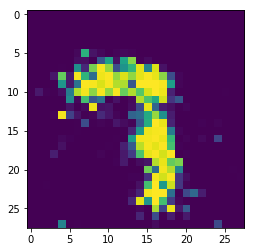

In [6]:

samples=[] #generator examples

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        num_batches=mnist.train.num_examples//batch_size
        for i in range(num_batches):
            batch=mnist.train.next_batch(batch_size)
            batch_images=batch[0].reshape((batch_size,784))
            batch_images=batch_images*2-1
            batch_z=np.random.uniform(-1,1,size=(batch_size,100))
            _=sess.run(D_trainer,feed_dict={real_images:batch_images,z:batch_z})
            _=sess.run(G_trainer,feed_dict={z:batch_z})
            
        print("on epoch{}".format(epoch))
        
        sample_z=np.random.uniform(-1,1,size=(1,100))
        gen_sample=sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
        
        samples.append(gen_sample)

plt.imshow(samples[0].reshape(28,28))
plt.imshow(samples[99].reshape(28,28))